# Decision Trees Intro

## Part 1: The Restaurant Dataset

In [19]:
import pandas as pd

In [51]:
# This will get the dataset
# It's a good practice to go ahead and download it (curl/wget)
# and change this cell to read locally

df = pd.read_csv("https://aet-cs.github.io/white/ML/lessons/restaurant.csv")

In [52]:
df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


Check out the documentation for [Decision Tree Classifiers](https://scikit-learn.org/1.5/modules/tree.html) and implement one for the Restaurant dataset. Print out your decision tree and its accuracy. (It's a small dataset so using all the data for training is OK)

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for c in df.columns:
    le.fit(df[c])
    df[c] = le.transform(df[c])

In [59]:
df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,1,2,0,1,4,2,3,1,2,3,3
1,1,2,0,1,3,0,0,0,1,2,4
2,0,1,2,0,2,0,0,0,0,3,3
3,1,2,1,3,3,0,0,0,1,1,6
4,1,2,1,2,0,2,3,1,2,5,0
5,0,1,2,1,4,1,2,3,3,6,3
6,0,1,2,0,1,0,1,2,0,3,1
7,0,0,0,1,4,1,2,3,4,0,3
8,0,1,3,2,0,0,1,2,0,5,0
9,1,3,3,3,3,2,3,1,3,7,5


In [61]:
y = df[' Wait']
X = df.drop(" Wait", axis = 1)

In [62]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)


[Text(0.5416666666666666, 0.9, 'x[3] <= 1.5\ngini = 0.806\nsamples = 12\nvalue = [2, 1, 1, 4, 1, 1, 2]\nclass =  Hun'),
 Text(0.3333333333333333, 0.7, 'x[4] <= 1.5\ngini = 0.612\nsamples = 7\nvalue = [0, 1, 1, 4, 1, 0, 0]\nclass =  Hun'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[2] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0, 0]\nclass =  Bar'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass =  Fri'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0]\nclass =  Bar'),
 Text(0.5, 0.5, 'x[5] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 0, 4, 1, 0, 0]\nclass =  Hun'),
 Text(0.4166666666666667, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 1, 1, 0, 0]\nclass =  Hun'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 0]\nclass =  Hun'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass =  Pat'),
 Text

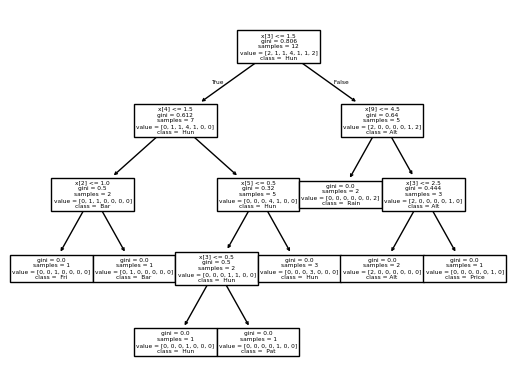

In [65]:
tree.plot_tree(clf, class_names = df.columns)

## Part 2: The entropy of English

Install nltk (natural language toolkit) following the commands below.

In [ ]:
!pip install nltk

The next cell will open an interactive window (which is a bit weird). Follow the prompts to download a library called 'brown'

In [ ]:
import nltk

## delete the next line after you download "brown" (or comment it)
nltk.download()

brown.words is a list of words

In [ ]:
from nltk.corpus import brown

In [ ]:
brown.words()

In [ ]:
len(brown.words())

Your job is to use these words to compute, using standard python, the entropy of the English language. Only consider 27 characters -- the alphabet plus space.

In [18]:
# your code!

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.DataFrame({
    'Alternate': ['No', 'Yes', 'No', 'Yes'],
    'Bar': ['Yes', 'No', 'Yes', 'No'],
    'Fri/Sat': ['Yes', 'No', 'Yes', 'No'],
    'Hungry': ['Yes', 'No', 'Yes', 'No'],
    'Patrons': ['Full', 'Some', 'None', 'Full'],
    'Price': ['$$', '$', '$$', '$$'],
    'Raining': ['No', 'Yes', 'No', 'Yes'],
    'Reservation': ['No', 'Yes', 'No', 'Yes'],
    'Type': ['Thai', 'Burger', 'Thai', 'French'],
    'WaitEstimate': ['30-60', '10-30', '0-10', '>60'],
    'WillWait': ['Yes', 'No', 'Yes', 'No']
})

# Separate features and target
X = data.drop(columns='WillWait')
y = data['WillWait']

# Define categorical columns for encoding
categorical_features = X.columns

# OneHotEncode categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)]
)

# Create a pipeline with the preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [68]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price', 'Raining',
       'Reservation', 'Type', 'WaitEstimate'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [71]:
# Predict and evaluate
y_pred = pipeline.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


In [72]:
X_test

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate
1,Yes,No,No,No,Some,$,Yes,Yes,Burger,10-30
3,Yes,No,No,No,Full,$$,Yes,Yes,French,>60


In [74]:
!pip install decision-tree-id3

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=a1754fdcc7f699feb2a26d178d43135a177eff94b922244616aa8d3d51e4f8ad
  Stored in directory: /home/pewhite/.cache/pip/wheels/54/e9/72/00b38b5d4f4464d8ee5ed73092f2167c88bac31e01fcc17d38
Successfully built decision-tree-id3

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from sklearn.datasets import load_breast_cancer
from id3 import Id3Estimator
from id3 import export_graphviz

bunch = load_breast_cancer()
estimator = Id3Estimator()
estimator.fit(bunch.data, bunch.target)
export_graphviz(estimator.tree_, 'tree.dot', bunch.feature_names)

ImportError: cannot import name 'six' from 'sklearn.externals' (/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/env/lib/python3.11/site-packages/sklearn/externals/__init__.py)

In [76]:
!pip install six


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
